In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")

In [3]:
traindata

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
traindata.shape

(2000, 21)

In [5]:
#info of the data
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
#Lets check the if the data have any duplicated values or not 
duplicated_values_count = len(traindata[traindata.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


In [7]:
traindata.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
#Description of data
traindata.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

# DATA VISUALIZATION, EXPERIMENTING WITH CHARTS : Understanding the relationship between variables

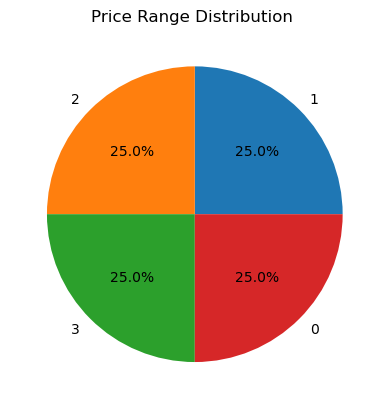

In [9]:
price_counts = traindata["price_range"].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct = '%1.1f%%')
plt.title("Price Range Distribution ")
plt.show()


#by drawing this chart we are able to know distribution of phones in percentage 
#so we have information about distributions

C:\Users\jpabh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


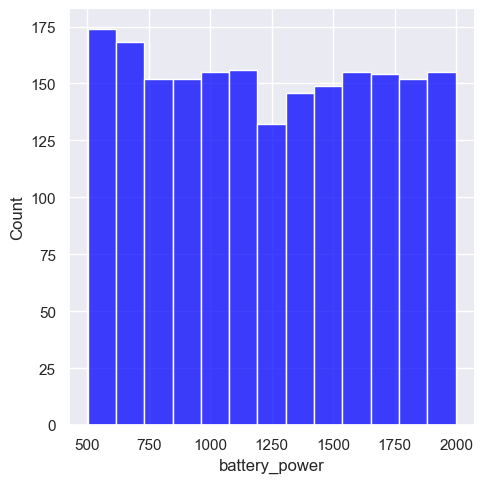

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(traindata["battery_power"], color='blue')
plt.show()   

#The insights gained from analyzing the relationship between the battery capacity and the price 
#of a mobile phone can potentially lead to a positive business impact.

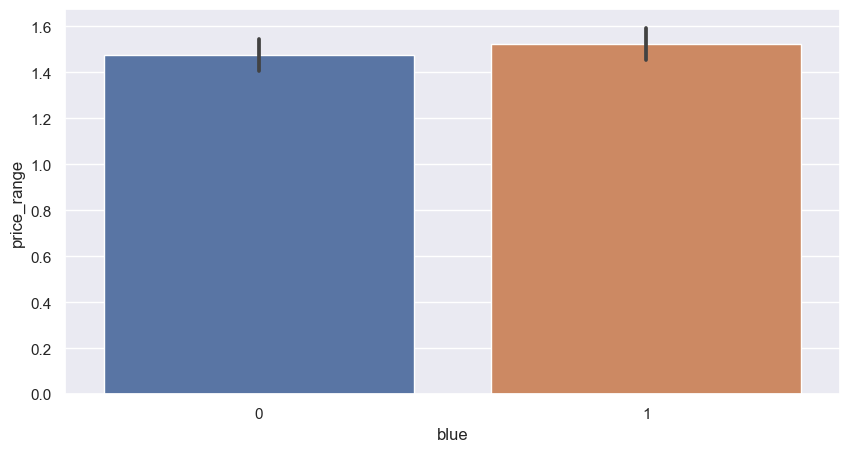

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=traindata, x='blue', y='price_range', ax=ax)
plt.show()

#By drwing this chart Almost half the devices have Bluetooth, and half don’t

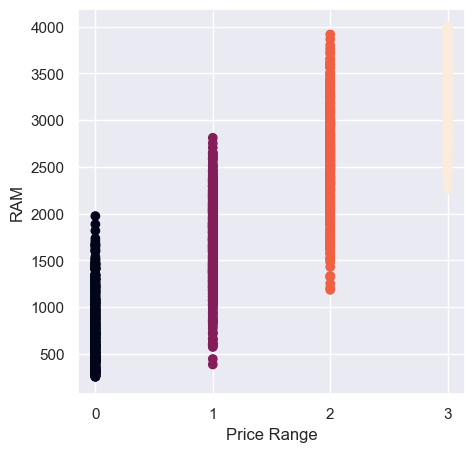

In [12]:
plt.scatter(traindata['price_range'], traindata['ram'], c=traindata['price_range'])
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

#The scatter plot shows a clear positive correlation between RAM and price 
#range, with the majority of the data points clustering towards the upper 
#right corner. This suggests that as the price range increases, the amount 
#of RAM in the device generally increases as well.

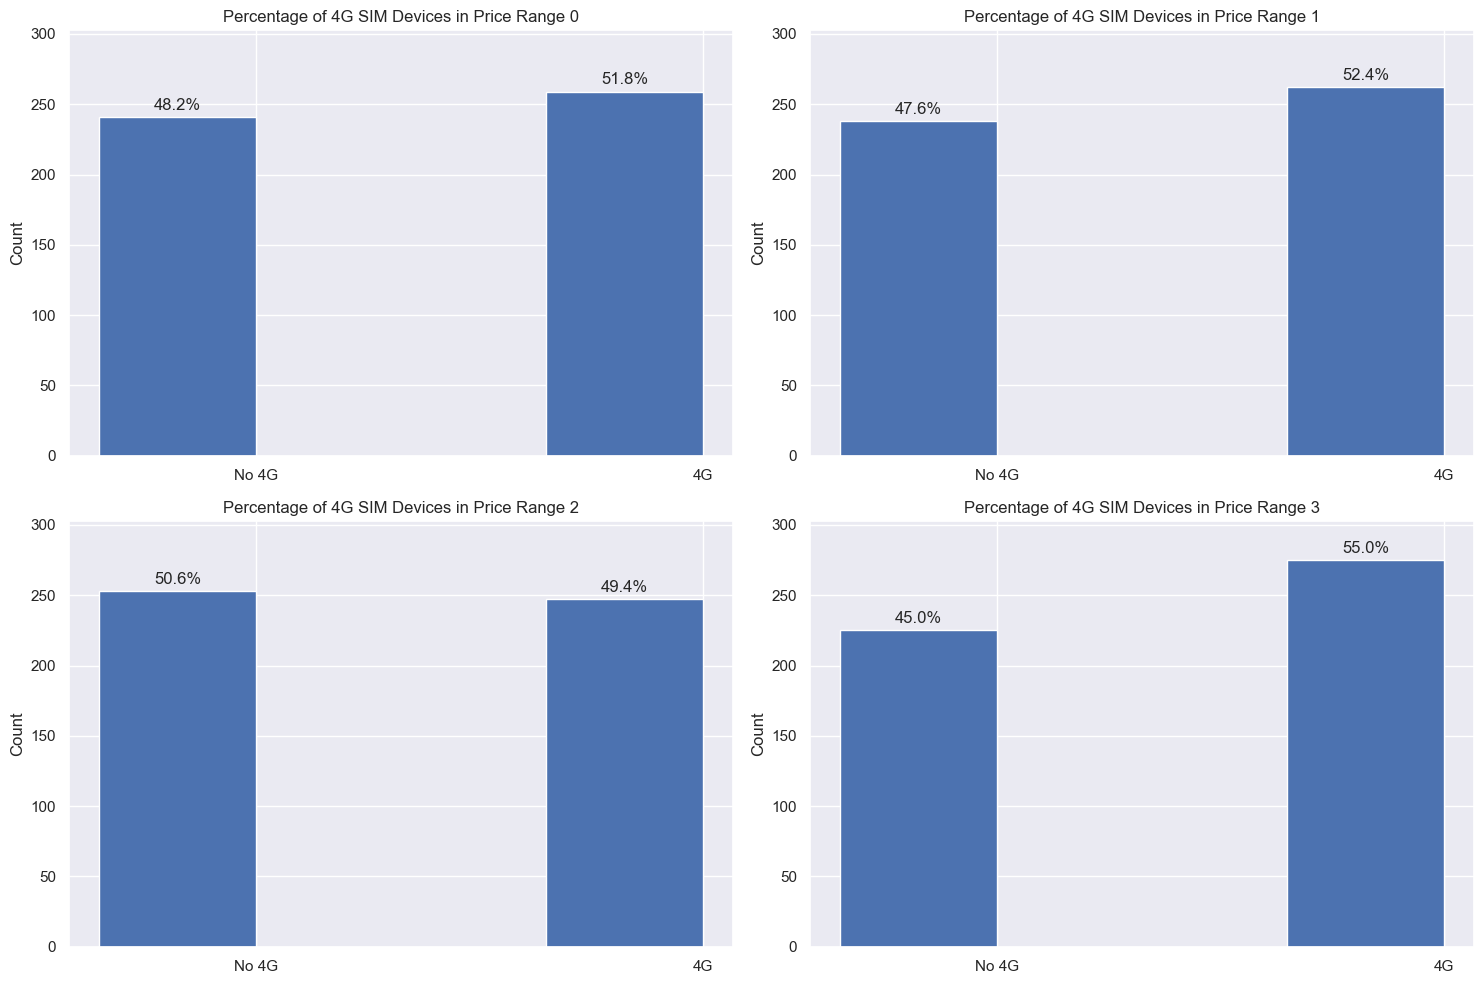

In [13]:
fourg_count = traindata.groupby(['price_range', 'four_g'])['four_g'].count()
fourg_count = fourg_count.unstack()
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

#By drawing this chart we found that at low (0), medium (1),very high (3) 
#prices the mobile phones having sim in more numbers but at high(2) prices 
#it is showing slightly collapse.

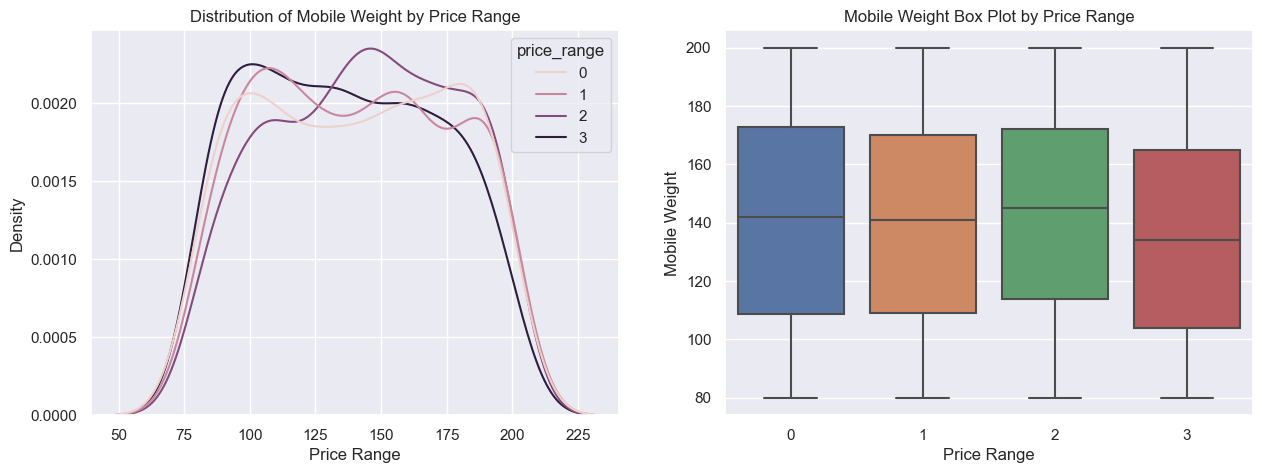

In [14]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=traindata, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=traindata, x='price_range', y='mobile_wt', ax=axs[1])
for ax in axs:
    ax.set_xlabel('Price Range')
axs[1].set_ylabel('Mobile Weight')
axs[0].set_title('Distribution of Mobile Weight by Price Range')
axs[1].set_title('Mobile Weight Box Plot by Price Range')
plt.show()

#It can be observed that mobile phones with higher price ranges tend to be 
#lighter in weight compared to lower price range phones.

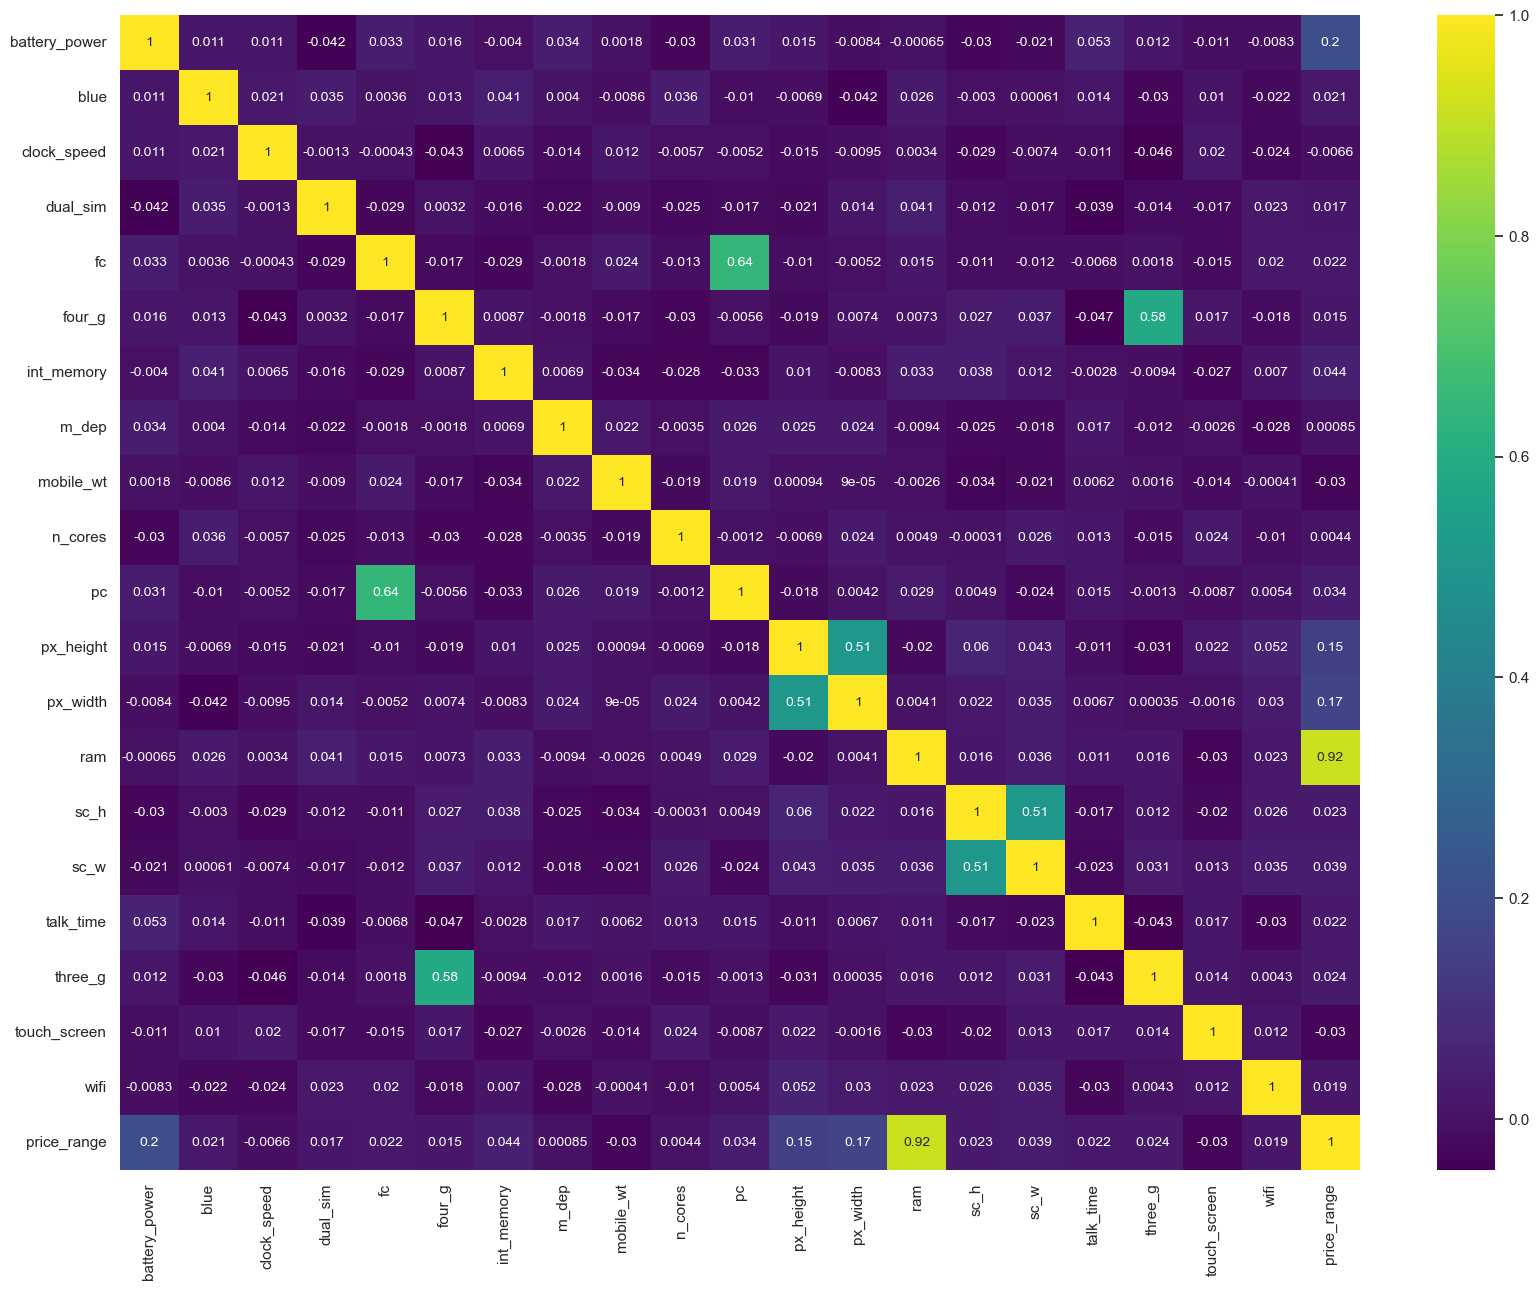

In [15]:
#Correlation Heatmap
correlation = traindata.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

#The high correlation between RAM and price_range is a positive sign for 
#businesses as it indicates that RAM will be a major deciding factor in 
#estimating the price range of a mobile phone.

# HYPOTHESIS TESTING

In [16]:
import scipy.stats as stats
null_prop = 0.75
n = 100
k = range(0, n+1)
null_probabilities = stats.binom.pmf(k, n, null_prop)
for i in range(len(k)):
    print("k =", k[i], "probability =", null_probabilities[i])

k = 0 probability = 6.223015277861173e-61
k = 1 probability = 1.8669045833583227e-58
k = 2 probability = 2.772353306287135e-56
k = 3 probability = 2.7169062401614005e-54
k = 4 probability = 1.976549289717431e-52
k = 5 probability = 1.1384923908772418e-50
k = 6 probability = 5.407838856666808e-49
k = 7 probability = 2.1785865108286599e-47
k = 8 probability = 7.59782045651491e-46
k = 9 probability = 2.3299982733312306e-44
k = 10 probability = 6.360895286194311e-43
k = 11 probability = 1.561310661156789e-41
k = 12 probability = 3.4739162210738324e-40
k = 13 probability = 7.054722172026841e-39
k = 14 probability = 1.315201776356432e-37
k = 15 probability = 2.2621470553330563e-36
k = 16 probability = 3.605296869437044e-35
k = 17 probability = 5.344322418224349e-34
k = 18 probability = 7.392979345210341e-33
k = 19 probability = 9.571962731167161e-32
k = 20 probability = 1.1629934718368003e-30
k = 21 probability = 1.3291353963849202e-29
k = 22 probability = 1.4318413133782987e-28
k = 23 proba

In [17]:
import statsmodels.stats.proportion as smprop

In [18]:
null_hypothesis = "The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis = "The proportion of devices with wifi availability is not equal to 0.75."

In [19]:
alpha = 0.05

In [20]:
n = 100
num_with_wifi = 75

In [21]:
test_stat, p_value = smprop.proportions_ztest(num_with_wifi, n, null_prop)

In [22]:
if p_value < alpha:
    print("Rejects the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Test statisitc:", test_stat)
print("p-value:", p_value)

Fail to reject the null hypothesis.
Test statisitc: 0.0
p-value: 1.0


The statistical analysis employed involved the one-sample proportion test, which assesses the significance of the difference between a sample proportion and a known population proportion. This test helps determine if the observed proportion in the sample significantly deviates from the expected proportion in the population.

# Hypothetical Statement - I have found that the 3g sims are present more in percentage in all price range.

Null hypothesis(H0): The proportion of device with 3G sims is the same across all price ranges.
Alternative hypothesis(Ha): The proportion of device with 3G sims is different across at least one pair of price ranges.    

In [23]:
import scipy.stats as stats
contingency_table = pd.crosstab(traindata['price_range'], traindata['three_g'])
print(contingency_table)
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385
Chi-square statistic: 1.3737644035343461
p-value: 0.7116958581372179


# Feature Engineering & Data Pre-processing 

1) Handling Missing Values

In [24]:
traindata.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

2. Handling Outliers

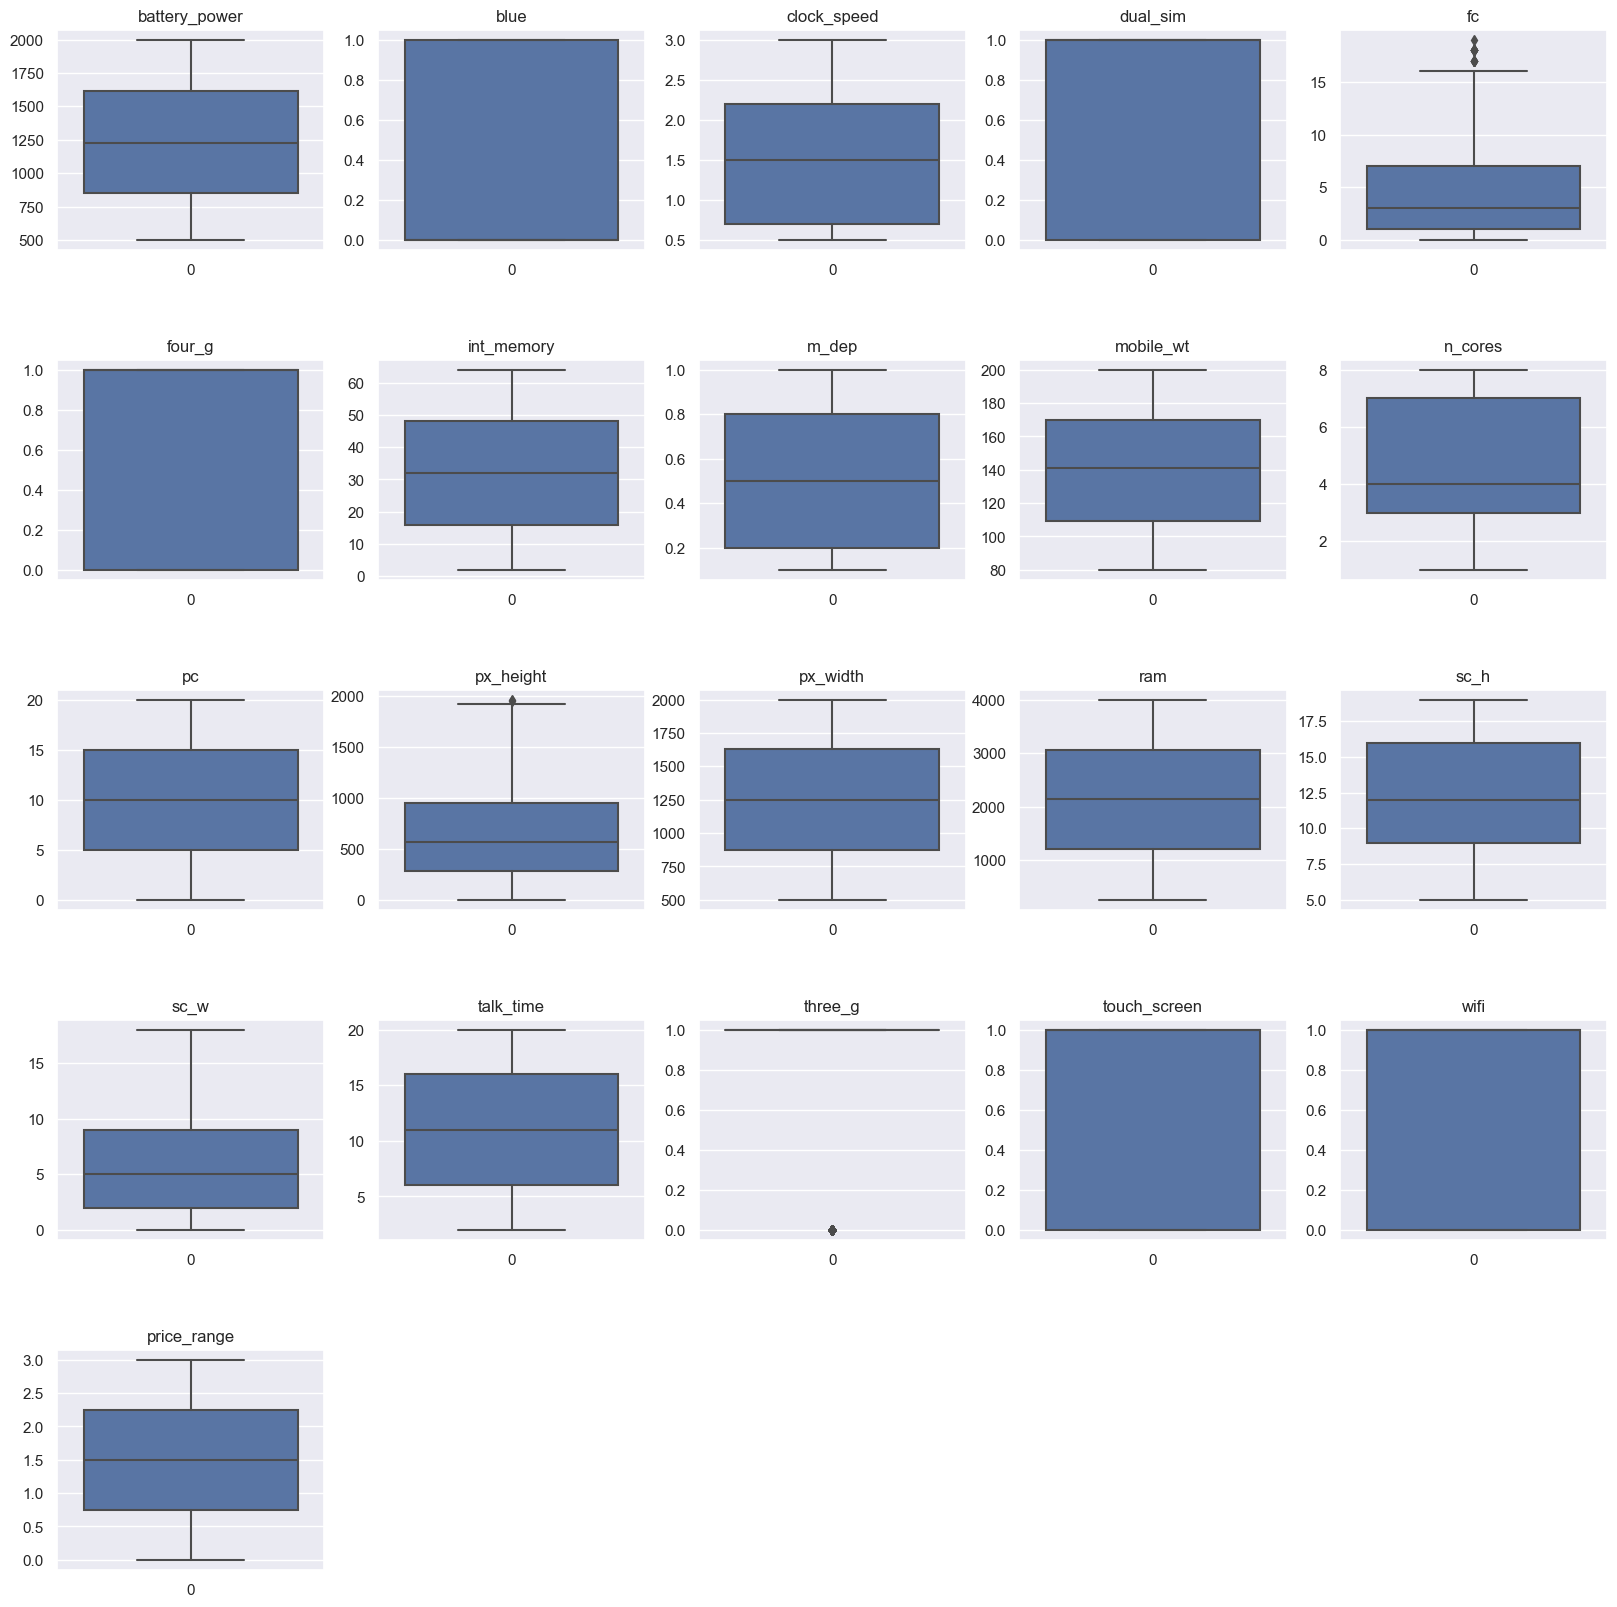

In [25]:
plt.figure(figsize = (20, 20))
for index, item in enumerate([i for i in traindata.describe().columns.to_list()]):
    plt.subplot(5, 5, index+1)
    plt.boxplot(traindata[item])
    sns.boxplot(traindata[item])
    plt.title(item)
    plt.subplots_adjust(hspace = 0.5)
print("\n")

Their is no much outliers are present no need to do much experiment.

# Data Transfomation

In [26]:
traindata.drop(['px_height', 'px_width'], axis = 1, inplace = True)
X = traindata.drop(['price_range'], axis = 1)
Y = traindata['price_range']

We have dropped px_height and px_width which dont have any use.

# Data Scaling  

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Data Splitting 

In [28]:
X = traindata.drop(['price_range'], axis = 1)
y = traindata['price_range']

In [29]:
X.shape

(2000, 18)

In [30]:
y.shape

(2000,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [32]:
X_train.shape

(1600, 18)

In [33]:
y_train.shape

(1600,)

# Model Implementation

LOGISTIC REGRESSION

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.68      0.76      0.72        82
           2       0.68      0.64      0.66        98
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 62 18  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


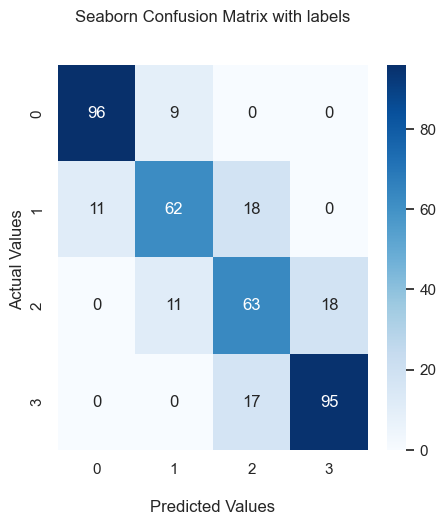

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


# Classification report for Test Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))
     

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       421
           1       0.75      0.79      0.77       386
           2       0.73      0.79      0.76       379
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



Cross-Validation and Hyperparameter Tuning 

In [36]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.8    0.825  0.83   0.8125 0.815 ]
Average cross-validation score: 0.8164999999999999


In [37]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best cross-validation score: 0.8225
Best parameters: {'C': 10}
Test set score: 0.8125


C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_train)
y_pred

array([1, 1, 0, ..., 2, 3, 1], dtype=int64)

In [42]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.61875


RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [45]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8075

In [46]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [47]:
# classification report for Test Set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.80      0.76      0.78        91
           2       0.65      0.76      0.70        92
           3       0.88      0.77      0.82       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



[[98  7  0  0]
 [10 69 12  0]
 [ 0 10 70 12]
 [ 0  0 26 86]]


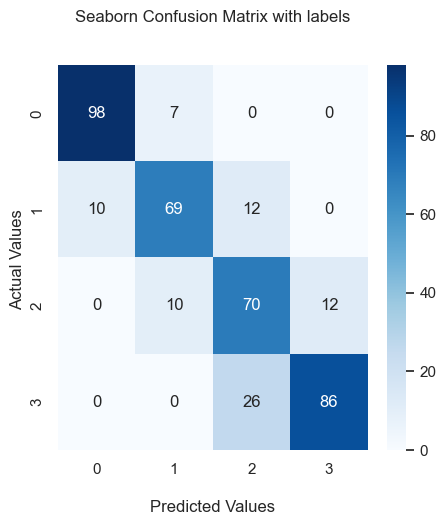

In [48]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.491006
1,battery_power,0.086683
2,mobile_wt,0.050508
3,int_memory,0.047525
4,talk_time,0.038705


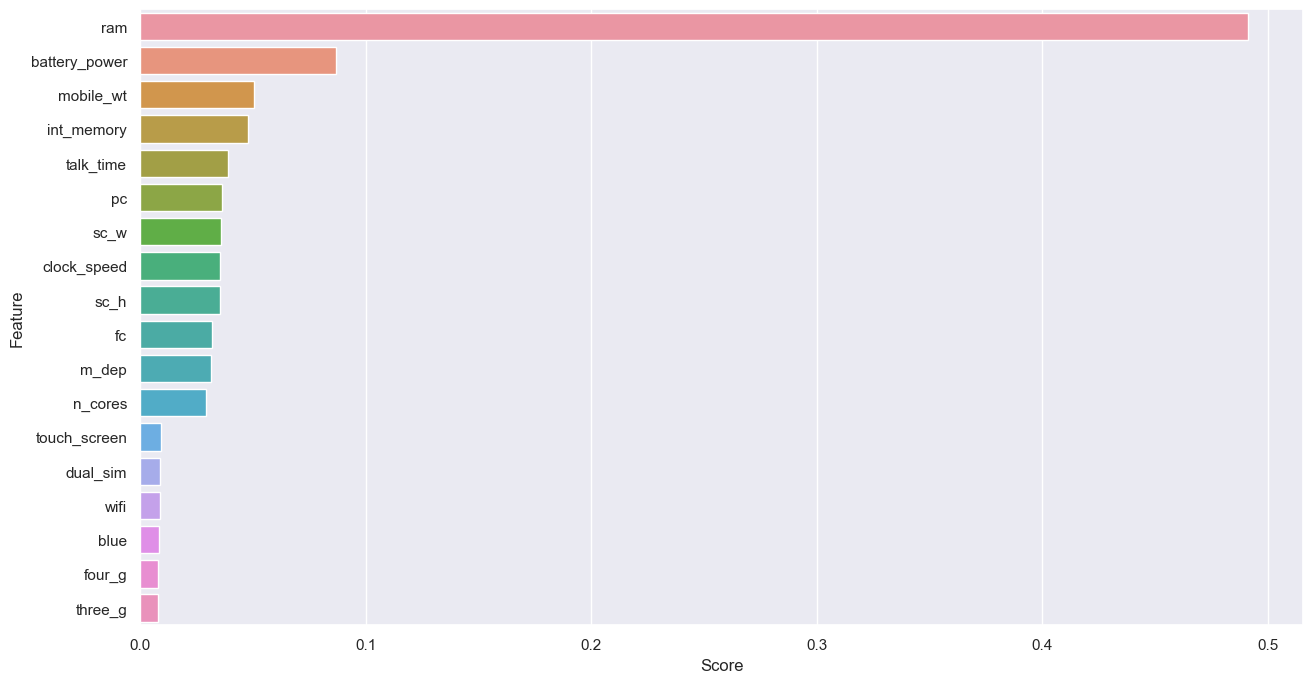

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

CROSS VALIDATION & HYPERPARAMETER TUNING 

In [51]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\jpabh\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jpabh\anaconda3\Lib\site-packa

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [52]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [53]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_leaf_nodes=40, n_estimators=200)

In [54]:
clsr.best_score_

0.8080036558297428

[[98  7  0  0]
 [10 69 12  0]
 [ 0 10 70 12]
 [ 0  0 26 86]]


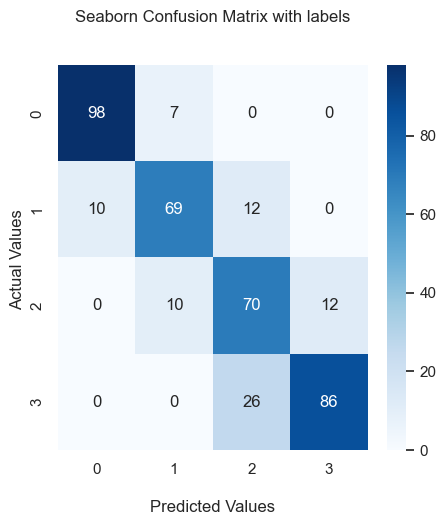

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [57]:
# accuracy score for Training set
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.90125

In [58]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       395
           1       0.88      0.84      0.86       409
           2       0.88      0.86      0.87       408
           3       0.94      0.94      0.94       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [59]:
# accuracy score for Test set
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)
     

0.805

In [60]:
print('Classification report for Logistic Regression') 
print(classification_report(y_test, y_pred))

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.81      0.74      0.77        91
           2       0.64      0.72      0.68        92
           3       0.86      0.79      0.82       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



In [61]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.694885
1,battery_power,0.083811
2,mobile_wt,0.032711
3,int_memory,0.029761
4,pc,0.019858


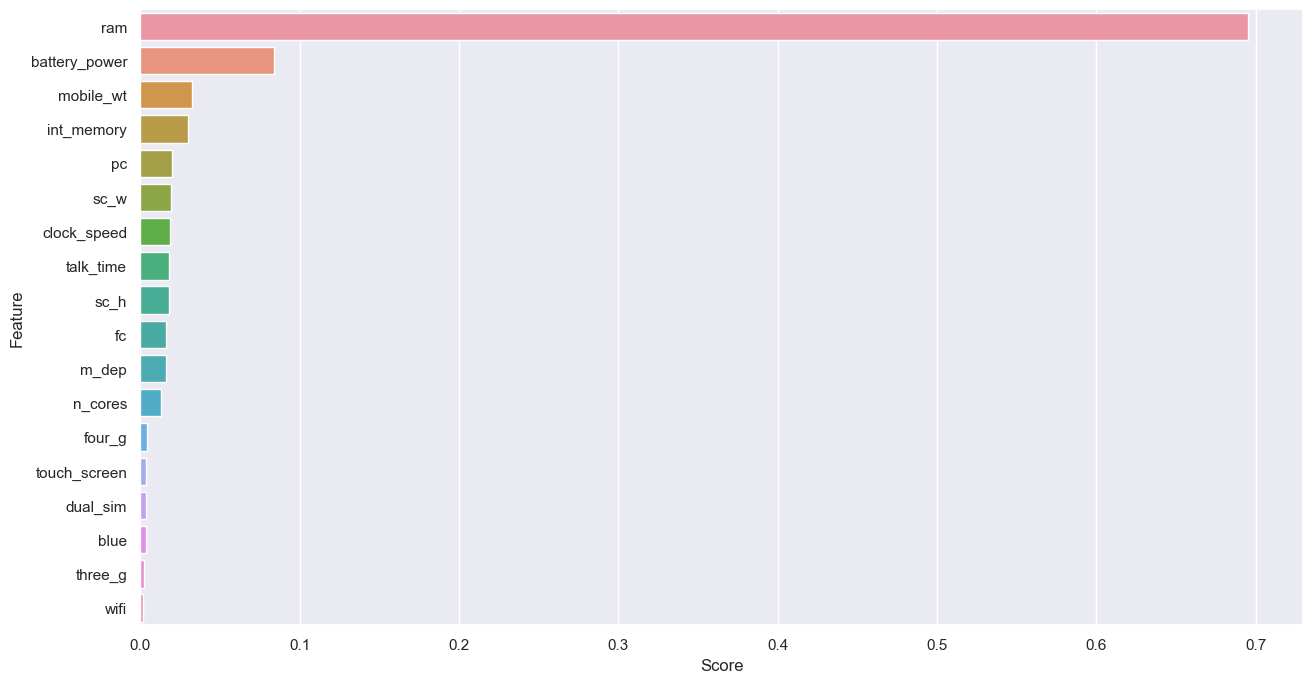

In [62]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

I have choose KNeighborsClassifier and random forest because they predict better results than random forest regression.

# Conclusion 

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality. Finally, we found that KNeighbors Classifier and Random Forest Classifier algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.

